In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [275]:
def CPEfun(Rx, Qx, px, freq):
    out = np.zeros_like(freq, dtype=complex128)
    out = 1./(1./Rx + Qx*(np.pi*2*freq*1j)**px)
    return out

def CPEfunElec(Rx, Qx, pex, pix, freq):
    out = np.zeros_like(freq, dtype=complex128)
    out = 1./(1./Rx + (1j)**pix*Qx*(np.pi*2*freq)**pex)
    return out

def CPEfunSeries(Rx, Qx, px, freq):
    out = np.zeros_like(freq, dtype=complex128)
    out = Rx + 1./(Qx*(np.pi*2*freq*1j)**px)
    return out

In [276]:
pathforPK = "/Users/sgkang/Google Drive/Zarcfit/nt01213a.z"
pathfordata = "../data/Kimberlite-2015-07-17.xls"
temp = np.loadtxt(pathforPK, skiprows=11, delimiter=",")
frequency = temp[:,0].copy()
data = pd.read_excel(pathfordata)
data_active = data.loc[np.logical_and((data['Facies'] == 'XVK')|(data['Facies'] == 'PK')|(data['Facies'] == 'HK')|(data['Facies'] == 'VK'), data.notnull()['Rinf']==True)][["Facies", "0LabID (PCG)", "Peregrine ID", "(Latitude)", "(Longitude)", "Depth (m)","Mag Susc [SI]","Resistivity [Ohm.m]","Geometric Factor [m]","Sat Geometric Dens [g/cc]","Chargeability [ms]","Rinf","Ro","Rh","Qh","Ph", "Fh","pRh", "pQh","Rm","Qm","Pm", "pRm", "pQm","Rl","Ql","Pl", "Fl", "pRl", "pQl","Re","Qe","Pe-f","Pe-i"]]

In [277]:
# data_active[data['Facies'] == 'HK']

In [278]:
labid = 'NT01213'

In [279]:
R0 = data_active[data['0LabID (PCG)'] == labid]['Ro'].values[0]
Rinf = data_active[data['0LabID (PCG)'] == labid]['Rinf'].values[0]
Rh = data_active[data['0LabID (PCG)'] == labid]['Rh'].values[0]
Qh = data_active[data['0LabID (PCG)'] == labid]['Qh'].values[0]
pRh = data_active[data['0LabID (PCG)'] == labid]['pRh'].values[0]
pQh = data_active[data['0LabID (PCG)'] == labid]['pQh'].values[0]
Ph = data_active[data['0LabID (PCG)'] == labid]['Ph'].values[0]
Fh = data_active[data['0LabID (PCG)'] == labid]['Fh'].values[0]
Rl = data_active[data['0LabID (PCG)'] == labid]['Rl'].values[0]
Ql = data_active[data['0LabID (PCG)'] == labid]['Ql'].values[0]
pRl = data_active[data['0LabID (PCG)'] == labid]['pRl'].values[0]
pQl = data_active[data['0LabID (PCG)'] == labid]['pQl'].values[0]
Pl = data_active[data['0LabID (PCG)'] == labid]['Pl'].values[0]
Re = data_active[data['0LabID (PCG)'] == labid]['Re'].values[0]
Qe = data_active[data['0LabID (PCG)'] == labid]['Qe'].values[0]
Pef = data_active[data['0LabID (PCG)'] == labid]['Pe-f'].values[0]
Pei = data_active[data['0LabID (PCG)'] == labid]['Pe-i'].values[0]

/Users/sgkang/anaconda/envs/py3/lib/python3.4/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [280]:
obs = temp[:,4]+1j*temp[:,5]

ImportError: No module named 'Utils'

In [473]:
def fitfun(R0, Rh, Qh, Ph, Rl, Ql, Pl, Re, Qe, Pef, Pei,plottype="realimag"):
    Zh = CPEfunSeries(Rh, Qh, Ph, frequency)
    Zl = CPEfunSeries(Rl, Ql, Pl, frequency)
    Ze = CPEfunElec(Re, Qe, Pef, Pei, frequency)
    pred = 1./(1./R0+1./Zh+1./Zl)+Ze

    fig = plt.figure(figsize = (14, 4))
#     fig.patch.set_facecolor('black')
    ax = plt.subplot(121)
    ax1 = plt.subplot(122)
    ax.patch.set_facecolor('black')
    ax1.patch.set_facecolor('black')
    if plottype=="realimag":
        ax.loglog(frequency, obs.real, 'lime', lw=3, marker=".", ms=8)
        ax1.loglog(frequency, abs(obs.imag), 'lime', lw=3, marker=".", ms=8)
        ax.loglog(frequency, pred.real, 'deepskyblue', lw=2)
        ax1.loglog(frequency, abs(pred.imag), 'deepskyblue', lw=2)
        ax.set_ylabel("Real (Ohm)")
        ax.set_xlabel("Frequency (Hz)")
        ax1.set_ylabel("Imaginary (Ohm)")
        ax1.set_xlabel("Frequency (Hz)")
        
        ax.invert_xaxis()
        ax1.invert_xaxis()
        ax.set_ylim(obs.real.min(), obs.real.max())
        ax1.set_ylim(abs(obs.imag).min(), abs(obs.imag).max())        
    elif plottype=="ampphase":
        amp = np.sqrt(obs.real**2+obs.imag**2)
        phase = np.arctan2(obs.real, obs.imag)
        ax.loglog(frequency, amp, 'lime', lw=3, marker=".", ms=8)
        ax1.loglog(frequency, phase, 'lime', lw=3, marker=".", ms=8)
        ax.loglog(frequency, abs(pred), 'deepskyblue', lw=2)
        ax1.loglog(frequency, np.arctan2(pred.real, pred.imag), 'deepskyblue', lw=2)
        ax.invert_xaxis()
        ax1.invert_xaxis()
        ax.set_ylim(amp.min(), amp.max())
        ax1.set_ylim(phase.min(), phase.max())       
        ax.set_ylabel("Amplitude (Ohm)")
        ax.set_xlabel("Frequency (Hz)")
        ax1.set_ylabel("Phase (rad)")
        ax1.set_xlabel("Frequency (Hz)")
        
    elif plottype=="zarc":        
        amp = np.sqrt(obs.real**2+obs.imag**2)
        amp_pred = np.sqrt(pred.real**2+pred.imag**2)
        ax.plot(obs.real, -obs.imag, 'lime', lw=3, marker=".", ms=8)
        ax.plot(pred.real, -pred.imag, 'deepskyblue', lw=2)
        ax1.semilogx(frequency[1:]*0.5+frequency[0:-1]*0.5, diff(np.log10(amp))/diff(np.log10(frequency)), 'lime', lw=3, marker=".", ms=8)
        ax1.semilogx(frequency[1:]*0.5+frequency[0:-1]*0.5, diff(np.log10(amp_pred))/diff(np.log10(frequency)), 'deepskyblue', lw=2)
        ax.set_xlim(obs.real.min(), obs.real.max())
        ax.set_ylim((-obs.imag).min(), (-obs.imag).max())
        ax.set_xlabel("Real (Ohm)")
        ax.set_ylabel("- Imaginary (Ohm)")
        ax1.set_xlabel("Frequency")
        ax1.set_ylabel("dlog(Amp)/dlog(Freq)")
        
        
    ax.grid(True)
    ax.yaxis.grid(True, which='minor')
    plt.tick_params(axis='y', which='minor')
    ax1.grid(True)
    ax1.yaxis.grid(True, which='minor')
    plt.tick_params(axis='y', which='minor')
#     ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
#     ax1.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
    
    leg = ax1.legend(("Observed", "Predicted"), fontsize = 12, bbox_to_anchor = (1.4, 1))
    for text in leg.get_texts():
        plt.setp(text, color = 'k')
    plt.show()
    return True

In [474]:
from matplotlib.ticker import FormatStrFormatter
# ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))

In [475]:
frequency[1:]*0.5+frequency[0:-1]*0.5

array([  8.15478650e+05,   5.14532250e+05,   3.24647900e+05,
         2.04838950e+05,   1.29244650e+05,   8.15478650e+04,
         5.14532250e+04,   3.24647900e+04,   2.04838950e+04,
         1.29244650e+04,   8.15478650e+03,   5.14532250e+03,
         3.24647900e+03,   2.04838950e+03,   1.29244650e+03,
         8.15478650e+02,   5.14532250e+02,   3.24647900e+02,
         2.04838950e+02,   1.29244650e+02,   8.15478650e+01,
         5.14532250e+01,   3.24647900e+01,   2.04838950e+01,
         1.29244650e+01,   8.15478500e+00,   5.14532000e+00,
         3.24648000e+00,   2.04839000e+00,   1.29244500e+00,
         8.15480000e-01,   5.14535000e-01,   3.24650000e-01,
         2.04840000e-01,   1.29245000e-01,   8.15500000e-02,
         5.14550000e-02,   3.24650000e-02])

In [476]:
# log Freq, d(log magnitude)/d(log Freq)

In [477]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
matplotlib.rcParams.update({'grid.color': 'white', 'grid.linewidth':1})

In [478]:
from IPython.html.widgets import interact, FloatText, FloatSlider, ToggleButtons

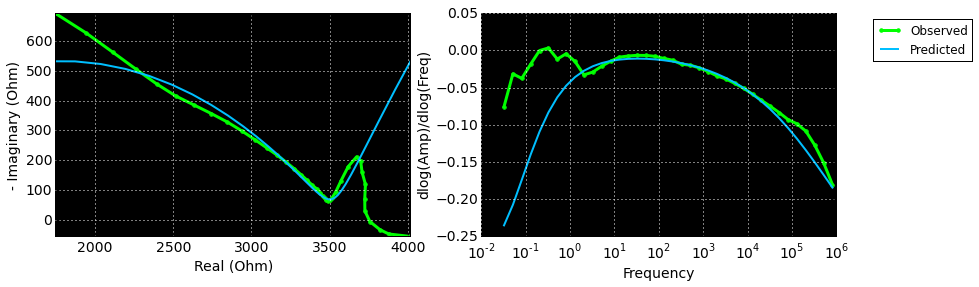

In [479]:
interact(fitfun, R0=FloatText(value=R0),\
    Rh=FloatSlider(min = 1, max = 10000., step = 100, value=pRh), 
    Qh=FloatText(value=pQh), 
    Ph=FloatSlider(min = 0.1, max = 1., step = 0.02, value=Ph),
    Rl=FloatSlider(min = 1, max = 10000., step = 100, value=Rl), 
    Ql=FloatText(value=pQl), 
    Pl=FloatSlider(min = 0.1, max = 1., step = 0.02, value=Pl),
    Re=FloatSlider(min = 1, max = 10000., step = 100, value=Re), 
    Qe=FloatText(value=Qe), 
    Pef=FloatSlider(min = 0.1, max = 1., step = 0.02, value=Pef), 
    Pei=FloatSlider(min = 0.1, max = 1., step = 0.02, value=Pei),
    plottype=ToggleButtons(options=['realimag','ampphase', 'zarc'])) 